## Fashion-mnistを使ったDeep Learning

In [1]:
# kerasをimportします(tensorflowのverも確認)
from __future__ import absolute_import, division, print_function, unicode_literals
 
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
 
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
 
print(tf.__version__)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

1.14.0


/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

In [2]:
!pip install seaborn

     |████████████████████████████████| 286kB 9.3MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
# データのロードを実施
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [4]:
# ラベル名を定義する
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
# imageデータ（学習）の形を確認する
train_images.shape

(60000, 28, 28)

In [6]:
# ラベルデータ（学習）の形を確認する
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
# imageデータ（テスト）の形を確認する
test_images.shape

(10000, 28, 28)

In [8]:
# ラベルデータ（テスト）の形を確認する
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

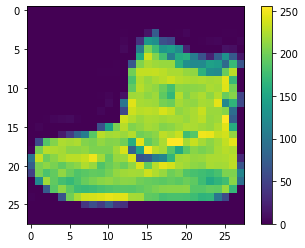

In [9]:
# 画像を表示してみる(1番目の画像)
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

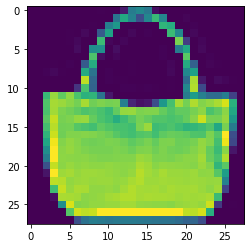

In [10]:
# 画像を表示してみる(100番目の画像)
plt.imshow(train_images[100])
plt.show()

In [11]:
# 0-255の整数値を0〜1の小数に変換する(正規化)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images = train_images / 255.0
test_images = test_images / 255.0

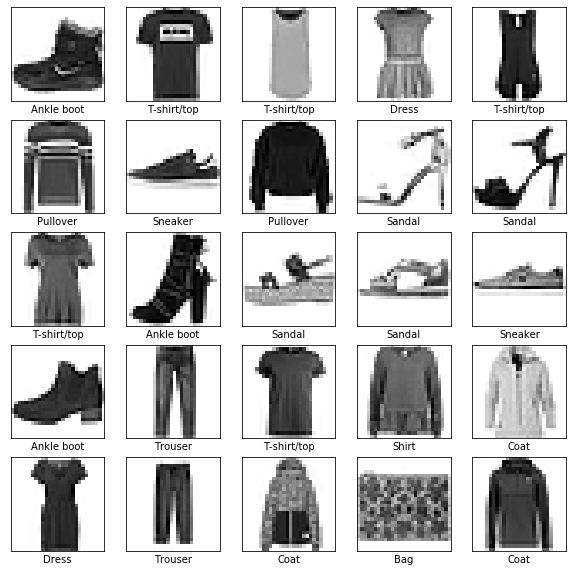

In [12]:
# input画像とラベルとラベル名がそれぞれ正確に紐づいていることを出力して確認する
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## ■ シンプルなニューラルネットワークを実行する (下記 P.67~72あたりを参照)
https://drive.google.com/file/d/1COk-yN6kZhwGjWCfEsp1E4V0ST8toYj4/view)

In [13]:
# モデルの定義
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [14]:
# optimixerと評価手法の設定
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# 実際に実行してみるとtestデータで90%程度
result = model.fit(train_images, train_labels,
                batch_size=128,
                epochs=20,
                verbose=1,
                validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 15s 247us/sample - loss: 0.5449 - acc: 0.8128 - val_loss: 0.4506 - val_acc: 0.8402
Epoch 2/20
60000/60000 [==============================] - 1s 23us/sample - loss: 0.3986 - acc: 0.8588 - val_loss: 0.4041 - val_acc: 0.8566
Epoch 3/20
60000/60000 [==============================] - 1s 22us/sample - loss: 0.3618 - acc: 0.8704 - val_loss: 0.3969 - val_acc: 0.8608
Epoch 4/20
60000/60000 [==============================] - 1s 23us/sample - loss: 0.3370 - acc: 0.8783 - val_loss: 0.3700 - val_acc: 0.8669
Epoch 5/20
60000/60000 [==============================] - 1s 22us/sample - loss: 0.3155 - acc: 0.8861 - val_loss: 0.3574 - val_acc: 0.8714
Epoch 6/20
60000/60000 [==============================] - 1s 22us/sample - loss: 0.3029 - acc: 0.8908 - val_loss: 0.3532 - val_acc: 0.8710
Epoch 7/20
60000/60000 [==============================] - 1s 23us/sample - loss: 0.2894 - acc: 0.8953 - val_loss: 

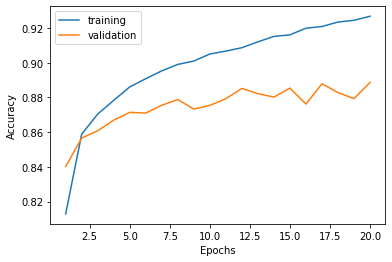

In [19]:
%matplotlib inline
 
plt.plot(range(1, 21), result.history['acc'], label="training")
plt.plot(range(1, 21), result.history['val_acc'], label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [20]:
from sklearn.metrics import confusion_matrix
 
predict_classes = model.predict_classes(test_images)
true_classes = test_labels
print(confusion_matrix(true_classes, predict_classes))


[[866   0  11  24   4   1  90   0   4   0]
 [  4 969   0  22   1   0   4   0   0   0]
 [ 18   1 801  21  96   1  61   0   1   0]
 [ 19   3   9 931  15   0  19   0   4   0]
 [  0   0  84  53 806   0  55   0   2   0]
 [  0   0   0   1   0 949   0  33   0  17]
 [128   0  81  34  71   0 681   0   5   0]
 [  0   0   0   0   0   6   0 982   0  12]
 [ 11   0   7   4   2   3   7   4 962   0]
 [  0   0   0   0   0   7   1  52   0 940]]


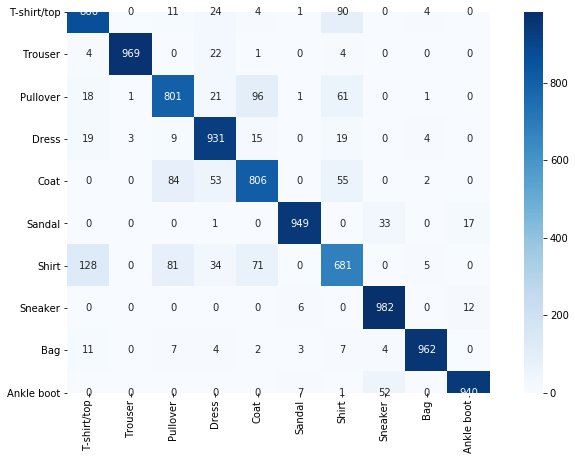

In [21]:
import seaborn as sn
import pandas as pd
def print_cmx(y_true, y_pred):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=class_names, columns=class_names)
 
    plt.figure(figsize = (12,7))
    sn.heatmap(df_cmx, annot=True, fmt='g' ,square = True,cmap="Blues",)
    plt.show()
 
print_cmx(true_classes, predict_classes)

## ■ DeepLearning(CNN)で実行する(下記 P.39~41あたりを参照)
https://drive.google.com/file/d/1COk-yN6kZhwGjWCfEsp1E4V0ST8toYj4/view

In [22]:
# チャネルの追加
X_train = train_images.reshape(train_images.shape + (1,))
X_test = test_images.reshape(test_images.shape + (1,))

In [23]:
# モデルの定義
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(28, 28, 1)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

Using TensorFlow backend.


In [24]:
# optimizerと評価手法の設定
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
# 実際に実行してみるとtestデータで91~93%程度
result = model.fit(X_train, train_labels,
                batch_size=128,
                epochs=20,
                verbose=1,
                validation_data=(X_test, test_labels))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 56s 934us/step - loss: 0.5860 - accuracy: 0.7848 - val_loss: 0.3683 - val_accuracy: 0.8671
Epoch 2/20
60000/60000 [==============================] - 10s 161us/step - loss: 0.3591 - accuracy: 0.8690 - val_loss: 0.3055 - val_accuracy: 0.8938
Epoch 3/20
60000/60000 [==============================] - 10s 163us/step - loss: 0.3056 - accuracy: 0.8885 - val_loss: 0.2660 - val_accuracy: 0.9021
Epoch 4/20
60000/60000 [==============================] - 11s 176us/step - loss: 0.2768 - accuracy: 0.8993 - val_loss: 0.2570 - val_accuracy: 0.9071
Epoch 5/20
60000/60000 [==============================] - 11s 182us/step - loss: 0.2567 - accuracy: 0.9060 - val_loss: 0.2316 - val_accuracy: 0.9139
Epoch 6/20
60000/60000 [==============================] - 11s 179us/step - loss: 0.2410 - accuracy: 0.9108 - val_loss: 0.2296 - val_accuracy: 0.9155
Epoch 7/20
60000/60000 [==============================]

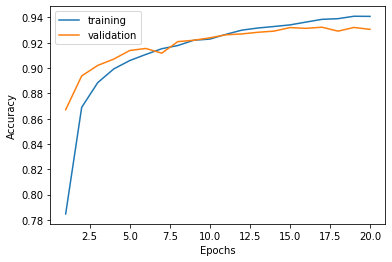

In [29]:
%matplotlib inline
 
plt.plot(range(1, 21), result.history['accuracy'], label="training")
plt.plot(range(1, 21), result.history['val_accuracy'], label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [30]:
from sklearn.metrics import confusion_matrix
 
predict_classes = model.predict_classes(X_test)
true_classes = test_labels
print(confusion_matrix(true_classes, predict_classes))


[[891   0  22   7   2   1  72   0   5   0]
 [  0 987   0   6   2   0   4   0   1   0]
 [ 16   1 912   8  31   0  32   0   0   0]
 [ 12   3   6 943  13   0  22   0   1   0]
 [  0   0  42  27 863   0  68   0   0   0]
 [  0   0   0   0   0 989   0   6   0   5]
 [ 95   0  45  24  41   0 794   0   1   0]
 [  0   0   0   0   0   7   0 965   0  28]
 [  4   0   2   2   3   1   1   1 986   0]
 [  0   0   1   0   0   4   0  19   0 976]]


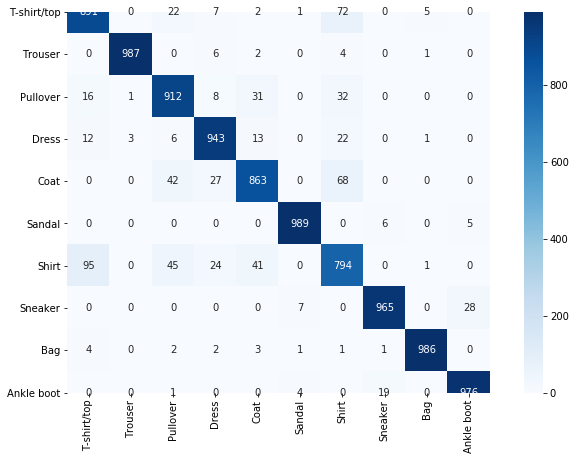

In [31]:
import seaborn as sn

def print_cmx(y_true, y_pred):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=class_names, columns=class_names)
 
    plt.figure(figsize = (12,7))
    sn.heatmap(df_cmx, annot=True, fmt='g' ,square = True,cmap="Blues",)
    plt.show()
 
print_cmx(true_classes, predict_classes)

## ■ 最適化手法やパラメーターを少しいじってみる

In [32]:
# RMSpropを使い、dropoutなどを調整
# Epoch 10回で実行してみた結果（精度良くない、実際に実行しなくてよい）
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(28, 28, 1)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

# one-hot vector形式に変換する
from keras.utils import np_utils
Y_train = np_utils.to_categorical(train_labels, 10)
Y_test = np_utils.to_categorical(test_labels, 10)

from keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-4),
              metrics=['acc'])
result = model.fit(X_train, Y_train,
                batch_size=32,
                epochs=10,
                verbose=1,
                validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 28s 474us/step - loss: 0.4926 - acc: 0.8226 - val_loss: 0.3385 - val_acc: 0.8823
Epoch 2/10
60000/60000 [==============================] - 29s 478us/step - loss: 0.3182 - acc: 0.8873 - val_loss: 0.2893 - val_acc: 0.8979
Epoch 3/10
60000/60000 [==============================] - 29s 482us/step - loss: 0.2703 - acc: 0.9043 - val_loss: 0.2574 - val_acc: 0.9083
Epoch 4/10
60000/60000 [==============================] - 29s 481us/step - loss: 0.2441 - acc: 0.9135 - val_loss: 0.2448 - val_acc: 0.9122
Epoch 5/10
60000/60000 [==============================] - 29s 482us/step - loss: 0.2303 - acc: 0.9194 - val_loss: 0.2413 - val_acc: 0.9199
Epoch 6/10
60000/60000 [==============================] - 29s 483us/step - loss: 0.2193 - acc: 0.9224 - val_loss: 0.2374 - val_acc: 0.9186
Epoch 7/10
60000/60000 [==============================] - 29s 483us/step - loss: 0.2182 - acc: 0.9231 - val_loss: 0.

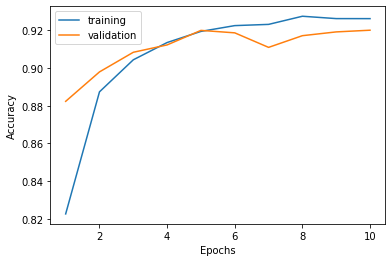

In [33]:
%matplotlib inline
 
plt.plot(range(1, 11), result.history['acc'], label="training")
plt.plot(range(1, 11), result.history['val_acc'], label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


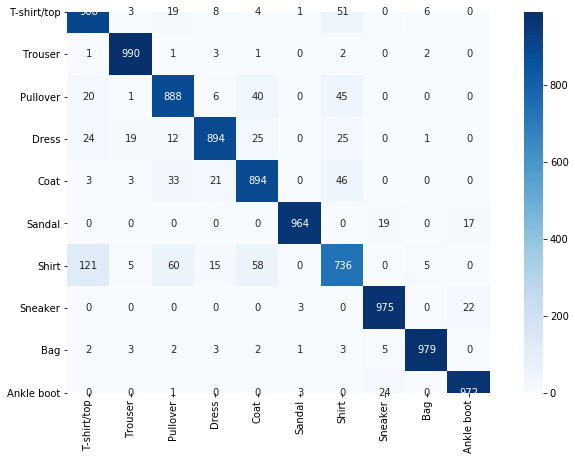

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
 
predict_classes = model.predict_classes(X_test)
true_classes = test_labels

def print_cmx(y_true, y_pred):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=class_names, columns=class_names)
 
    plt.figure(figsize = (12,7))
    sn.heatmap(df_cmx, annot=True, fmt='g' ,square = True,cmap="Blues",)
    plt.show()
 
print_cmx(true_classes, predict_classes)

### ちなみにDeeplearningを使わない手法であればこちらを参考に
http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/

## ■ Dropout層を外して実行する (下記 P.42~45あたりを参照)
https://drive.google.com/file/d/1COk-yN6kZhwGjWCfEsp1E4V0ST8toYj4/view?usp=sharing

In [35]:
# モデルの定義
# trainのACCが 100%に近づいていることを確認してもらいたい 、testのACCは向上していない(過学習)
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(28, 28, 1)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# optimizerと評価手法の設定
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 実際に実行してみるとtestデータで90%程度
result = model.fit(X_train, train_labels,
                batch_size=128,
                epochs=20,
                verbose=1,
                validation_data=(X_test, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 155us/step - loss: 0.4697 - accuracy: 0.8306 - val_loss: 0.3240 - val_accuracy: 0.8840
Epoch 2/20
60000/60000 [==============================] - 9s 151us/step - loss: 0.2832 - accuracy: 0.8971 - val_loss: 0.2728 - val_accuracy: 0.9026
Epoch 3/20
60000/60000 [==============================] - 9s 151us/step - loss: 0.2315 - accuracy: 0.9157 - val_loss: 0.2544 - val_accuracy: 0.9055
Epoch 4/20
60000/60000 [==============================] - 9s 151us/step - loss: 0.2031 - accuracy: 0.9257 - val_loss: 0.2379 - val_accuracy: 0.9168
Epoch 5/20
60000/60000 [==============================] - 9s 152us/step - loss: 0.1737 - accuracy: 0.9367 - val_loss: 0.2303 - val_accuracy: 0.9149
Epoch 6/20
60000/60000 [==============================] - 9s 152us/step - loss: 0.1496 - accuracy: 0.9445 - val_loss: 0.2374 - val_accuracy: 0.9203
Epoch 7/20
60000/60000 [==============================] - 9s 1

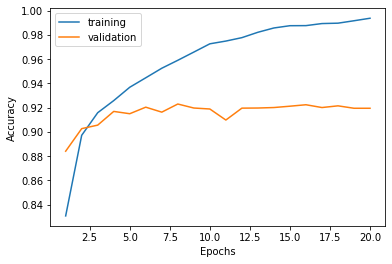

In [37]:
%matplotlib inline
 
plt.plot(range(1, 21), result.history['accuracy'], label="training")
plt.plot(range(1, 21), result.history['val_accuracy'], label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## ■ Kerasのapplication modelを使ってみる
https://keras.io/ja/applications/

In [38]:
from keras.applications.densenet import DenseNet121
from keras.preprocessing import image
from keras.models import Model
from keras import models
from keras import layers

base_model = DenseNet121(weights='imagenet', include_top=False,  input_shape = (32, 32, 3))

top_model = models.Sequential()
top_model.add(layers.Flatten(input_shape=base_model.output_shape[1:]))
top_model.add(layers.Dense(128, activation='relu'))
top_model.add(layers.Dropout(0.4))
top_model.add(layers.Dense(10, activation='softmax'))

model = Model(inputs=base_model.input, outputs=top_model(base_model.output))

# 115層以降の重みは変更する
for layer in base_model.layers[:116]:
    layer.trainable = False
    
    if layer.name.startswith('batch_normalization'):
        layer.trainable = True

for layer in model.layers[116:]:
    layer.trainable = True


29089792/29084464 [==============================] - 4s 0us/step


In [39]:
# optimizerと評価手法の設定
adam = optimizers.Adam(lr=5E-4,beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(optimizer=adam,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
# 32x32以上じゃないと読み込んでくれないので、無理やり 0 padding あとRGB(3チャンネル)
X_train_app = np.pad(X_train,[(0,0),(2,2),(2,2),(0,2)],"constant")
X_test_app = np.pad(X_test,[(0,0),(2,2),(2,2),(0,2)],"constant")

In [41]:
# 実際に実行してみると...(時間かかるでのepoch減らすこと)
result = model.fit(X_train_app, train_labels,
                batch_size=100,
                epochs=20,
                verbose=1,
                validation_data=(X_test_app, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 108s 2ms/step - loss: 0.4473 - accuracy: 0.8473 - val_loss: 1.5935 - val_accuracy: 0.4878
Epoch 2/20
60000/60000 [==============================] - 84s 1ms/step - loss: 0.2735 - accuracy: 0.9048 - val_loss: 1.5571 - val_accuracy: 0.5776
Epoch 3/20
60000/60000 [==============================] - 86s 1ms/step - loss: 0.2320 - accuracy: 0.9193 - val_loss: 1.6916 - val_accuracy: 0.6166
Epoch 4/20
60000/60000 [==============================] - 91s 2ms/step - loss: 0.2021 - accuracy: 0.9280 - val_loss: 2.5041 - val_accuracy: 0.5087
Epoch 5/20
60000/60000 [==============================] - 83s 1ms/step - loss: 0.1796 - accuracy: 0.9356 - val_loss: 2.9114 - val_accuracy: 0.5216
Epoch 6/20
60000/60000 [==============================] - 85s 1ms/step - loss: 0.1621 - accuracy: 0.9415 - val_loss: 3.8921 - val_accuracy: 0.4990
Epoch 7/20
60000/60000 [==============================] - 85s 1ms/s

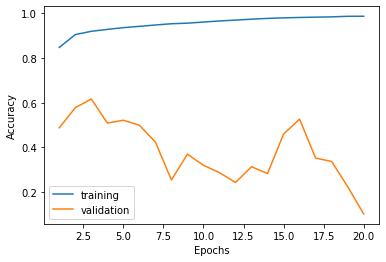

In [43]:
%matplotlib inline
 
plt.plot(range(1, 21), result.history['accuracy'], label="training")
plt.plot(range(1, 21), result.history['val_accuracy'], label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
